In [2]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
from scipy import fft
from scipy.fftpack import dct, idct
from sklearn import linear_model
from pydub import AudioSegment
import os
import scipy.signal as sig
from tqdm import tqdm

/opt/anaconda3/lib/python3.9/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
import glob
audio_files = glob.glob('./*.wav')

In [4]:
audio_files[0][2:-4]

'guitar'

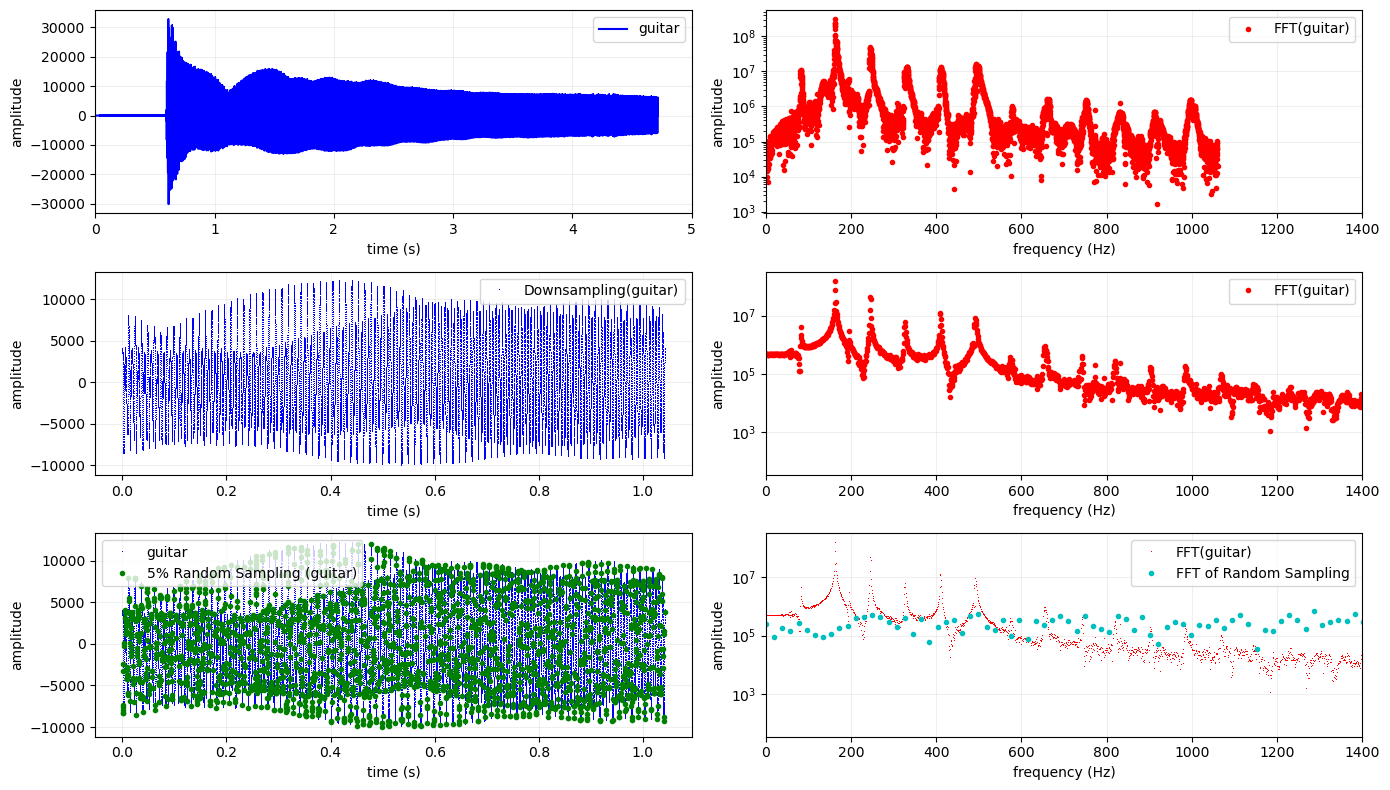

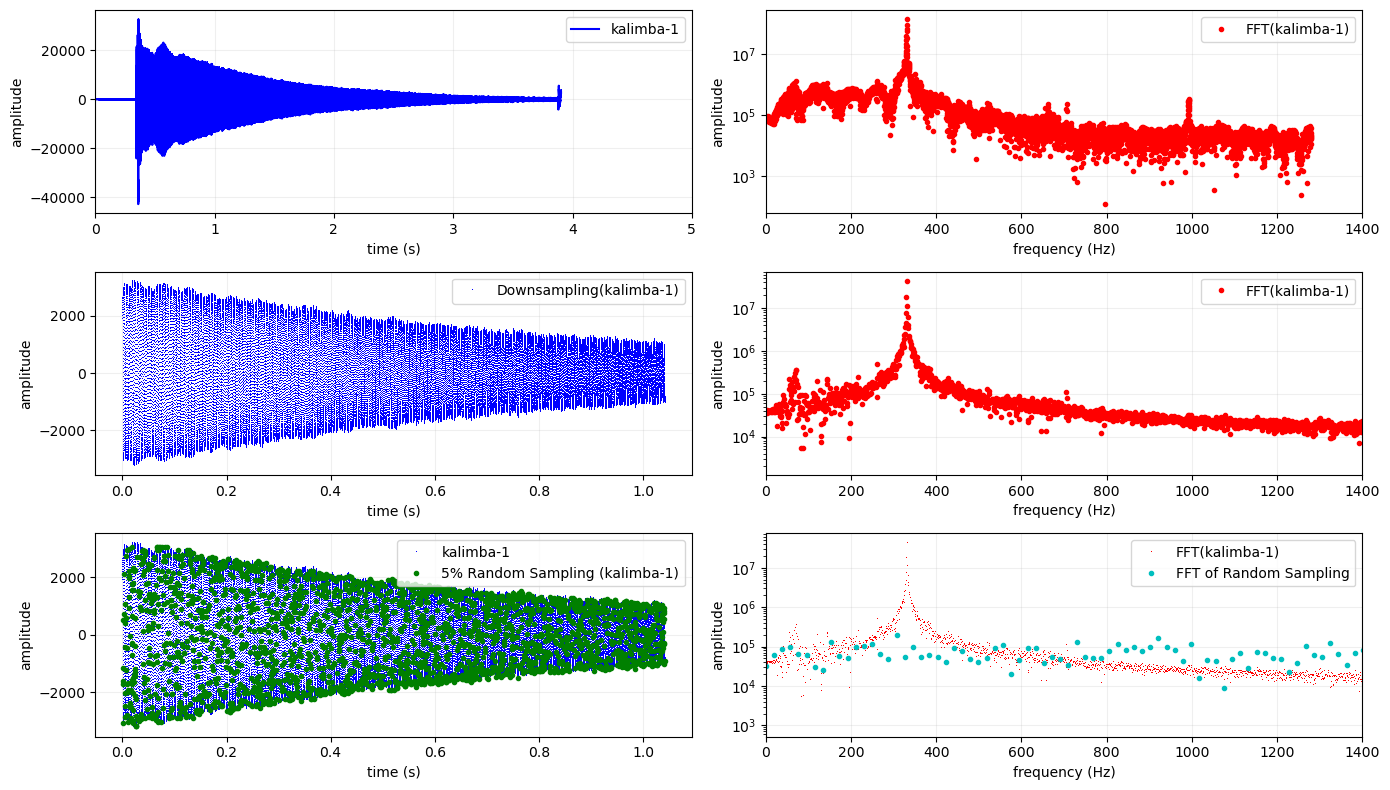

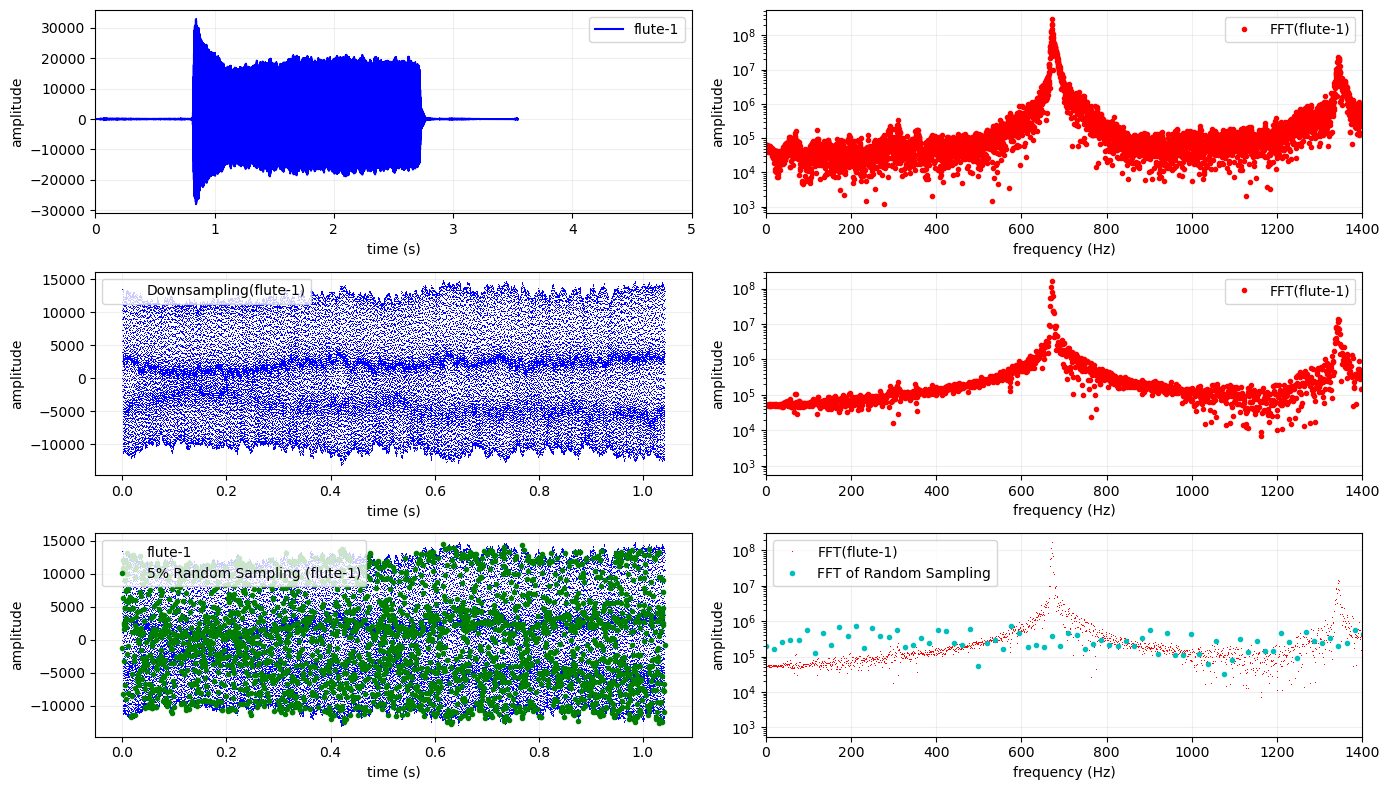

In [5]:
for audio in audio_files:
    plt.figure(dpi = 100, figsize = (14, 8))

    plt.subplot(3,2,1)
    plt.grid(alpha = 0.2)
    rate, data = wavfile.read(audio)
    signal = (data/np.max(data)) * 32767
    length = signal.shape[0] / rate           ### Max duration in sec
    t = np.linspace(0., length, signal.shape[0])
    plt.plot(t, signal, 'b-,',label = audio[2:-4])
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.xlim(0,5)
    plt.legend()
    
    plt.subplot(3,2,2)
    plt.grid(alpha = 0.2)
    N = int(rate*length)
    yf = fft.rfft(data)
    xf = fft.rfftfreq(N, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'r.', label = 'FFT('+str(audio[2:-4]+')'))
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')
    plt.xlim(0,1400)
    plt.yscale('log')
    plt.legend()
#     plt.show()
    
    
#     plt.figure(dpi = 150, figsize = (15, 3))
#     plt.suptitle('Reduced Sampling Rate')
    
    plt.subplot(3,2,3)
    plt.grid(alpha = 0.2)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])

    plt.plot(t_, signal_, 'b,',label = 'Downsampling(' + str(audio[2:-4]) + ')')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    # plt.xlim(0,5)
    plt.legend()

    plt.subplot(3,2,4)
    plt.grid(alpha = 0.2)
    N = int(rate*length)
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'r.', label = 'FFT('+str(audio[2:-4]+')'))
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')
    plt.xlim(0,1400)
    plt.yscale('log')
    plt.legend()
#     plt.show()
    
    
    percent = 0.05
    numIndices = int(percent*len(signal_))
    allIndices = np.random.randint(0, len(signal_),len(signal_))
    indices = sorted(allIndices[:numIndices])

#     plt.figure(dpi = 150, figsize = (15, 3))
#     plt.suptitle('Random Sampling (5%)')
    plt.subplot(3,2,5)
    plt.grid(alpha = 0.2)

    signal_rs = np.zeros(numIndices)
    t_rs = np.zeros(numIndices)

    for idx, val in enumerate(indices):
        signal_rs[idx] = signal_[val]
        t_rs[idx] = t_[val]
        
    plt.plot(t_, signal_, 'b,',label = audio[2:-4])
    plt.plot(t_rs, signal_rs, 'g.',label = '5% Random Sampling ('+str(audio[2:-4])+')')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(3,2,6)
    plt.grid(alpha = 0.2)
    N_rs = int(signal_rs.shape[0])
    yf_ = fft.rfft(signal_rs)
    xf_ = fft.rfftfreq(N_rs, 1 / rate)
    end = 5000
    
    plt.plot(xf[:end],np.abs(yf[:end]), 'r,', label = 'FFT('+str(audio[2:-4]+')'))
    plt.plot(xf_[:end],np.abs(yf_[:end]), 'c.', label = 'FFT of Random Sampling')
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')
    plt.xlim(0,1400)
    plt.yscale('log')
    plt.legend()

    plt.tight_layout()
    plt.show()
    

# Audio Signal, its FFT, and Spectrogram

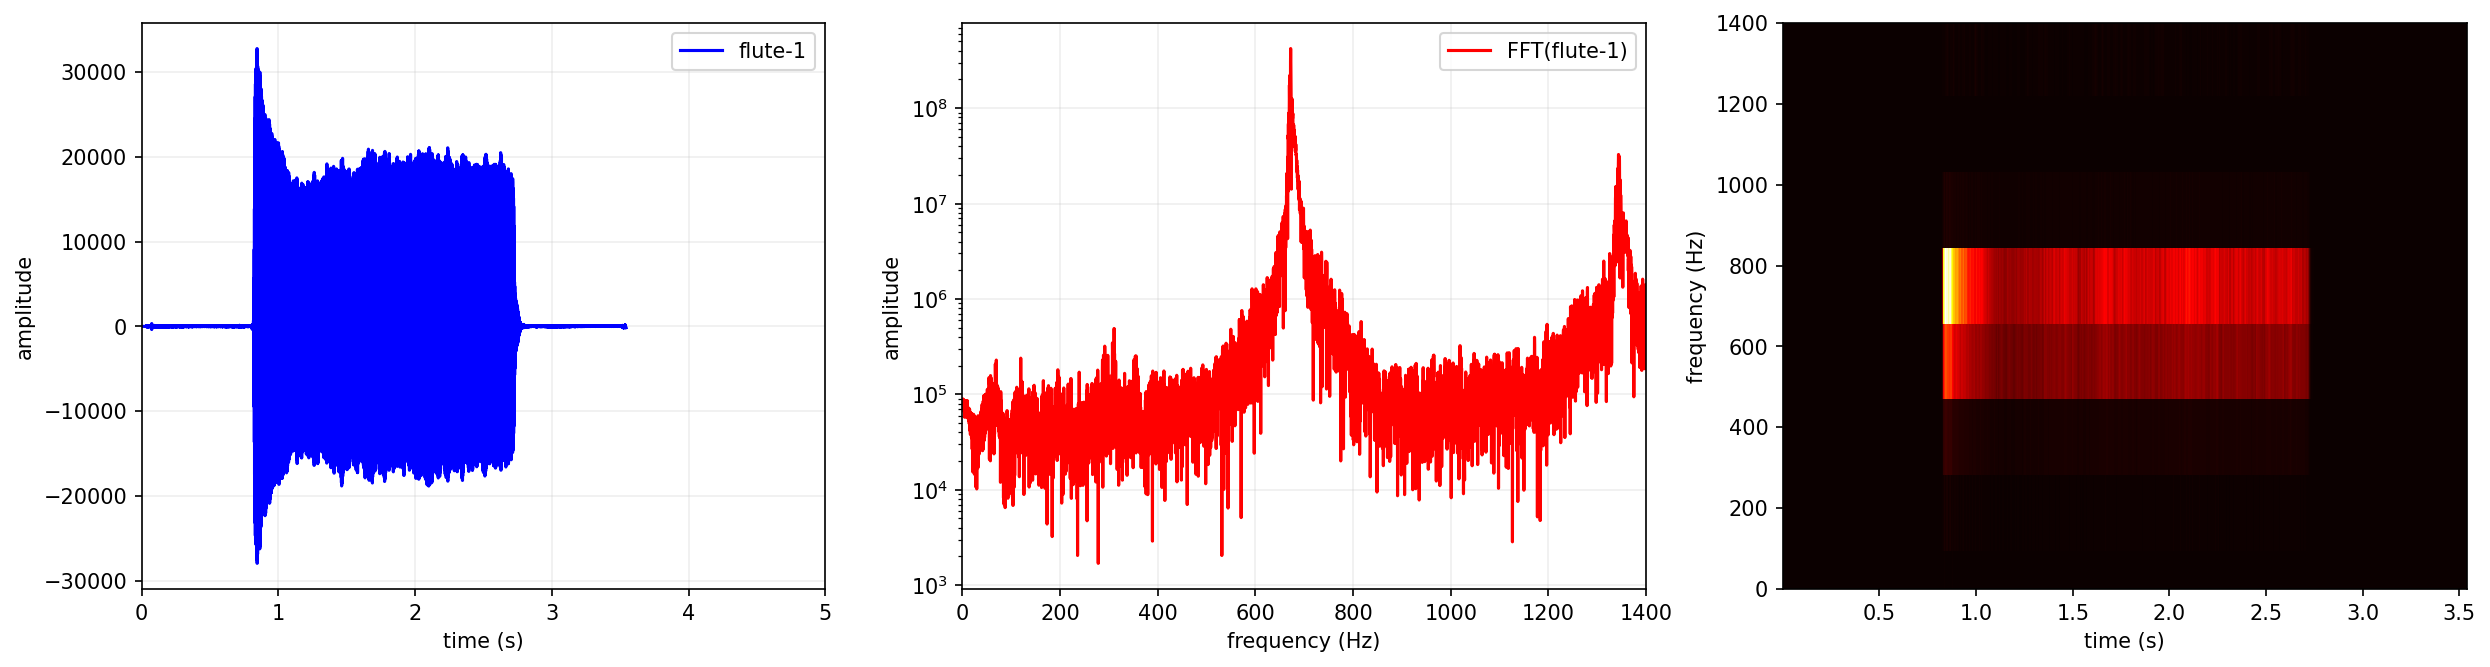

In [6]:
audio = audio_files[2]

plt.figure(dpi = 150, figsize = (20, 5))

plt.subplot(1,3,1)
plt.grid(alpha = 0.2)
rate, data = wavfile.read(audio)
signal = (data/np.max(data)) * 32767
length = signal.shape[0] / rate           ### Max duration in sec
t = np.linspace(0., length, signal.shape[0])
plt.plot(t, signal, 'b',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.xlim(0,5)
plt.legend()

plt.subplot(1,3,2)
plt.grid(alpha = 0.2)
N = int(rate*length)
yf = fft.rfft(signal)
xf = fft.rfftfreq(N, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()

plt.subplot(1,3,3)
f,t,Sxx = sig.spectrogram(data,rate)
plt.pcolormesh(t,f,Sxx, cmap="hot")
plt.ylim(0,1400)
plt.ylabel('frequency (Hz)')
plt.xlabel('time (s)')
plt.show()

# Reduced Sampling Rate

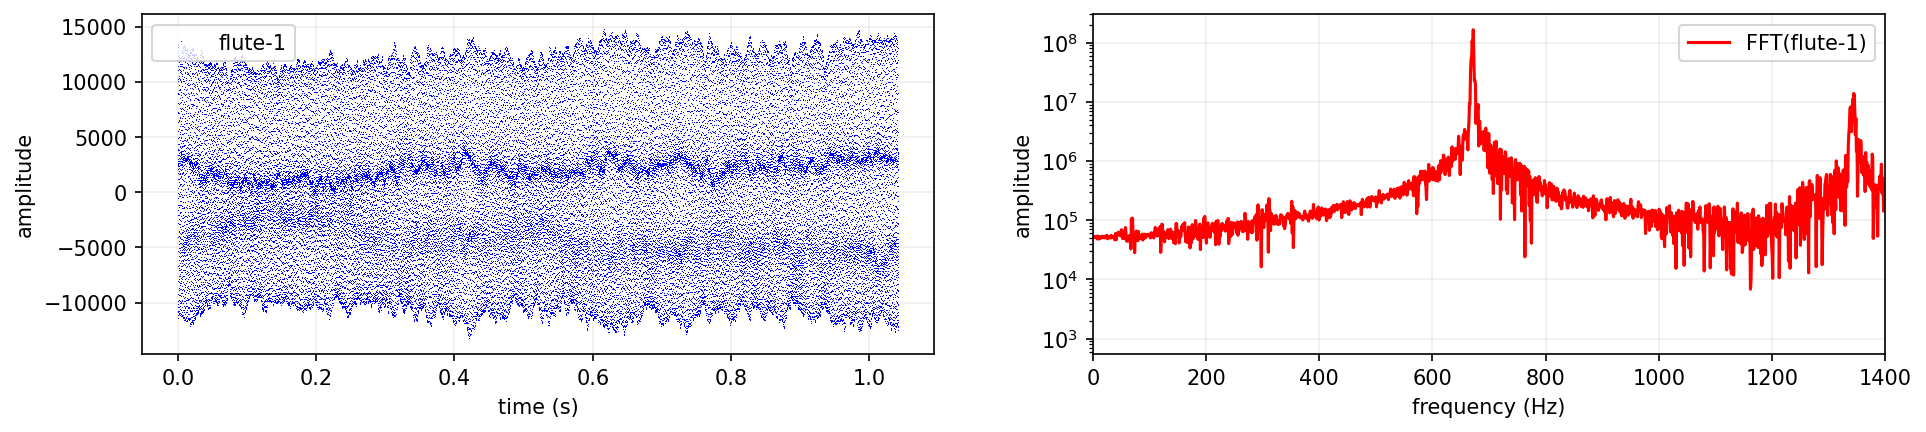

In [7]:
plt.figure(dpi = 150, figsize = (15, 3))

plt.subplot(1,2,1)
plt.grid(alpha = 0.2)
signal_ = data[50000:100000]               
signal_ = (signal_/np.max(signal)) * 32767
length = signal_.shape[0] / rate           ### Max duration in sec
t_ = np.linspace(0., length, signal_.shape[0])

plt.plot(t_, signal_, 'b,',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(1,2,2)
plt.grid(alpha = 0.2)
N = int(rate*length)
yf = fft.rfft(signal_)
xf = fft.rfftfreq(N, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()
plt.show()

# Random Sampling

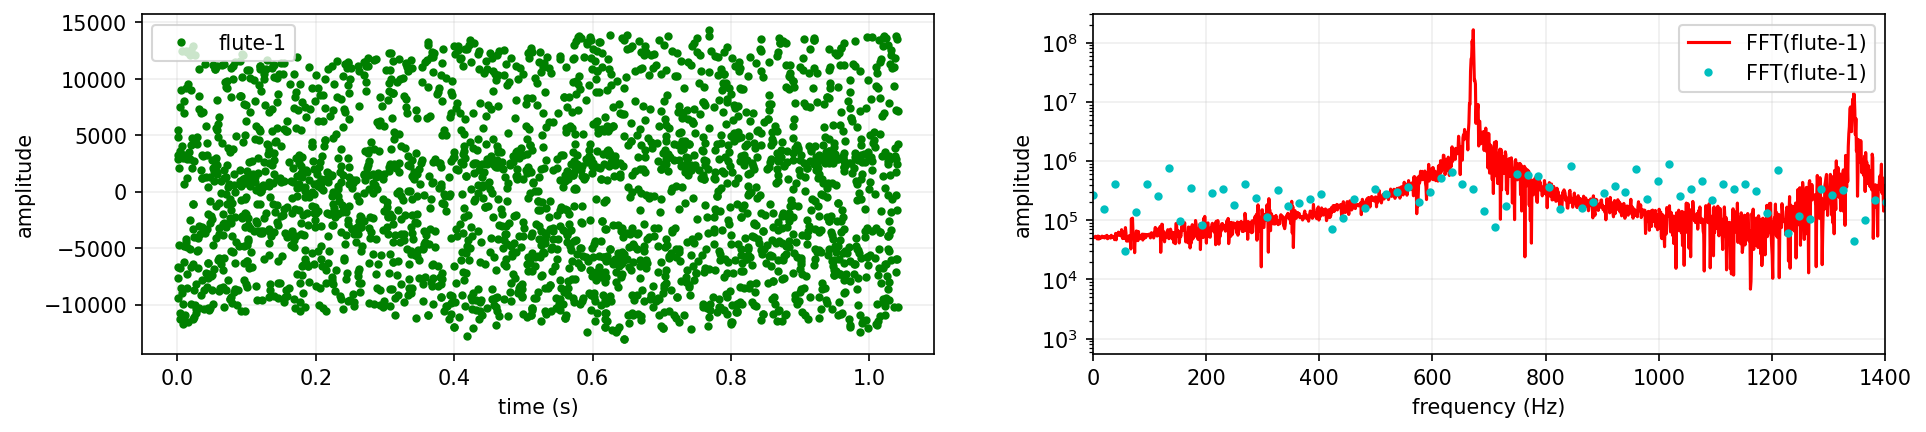

In [8]:
percent = 0.05
numIndices = int(percent*len(signal_))
allIndices = np.random.randint(0, len(signal_),len(signal_))
indices = sorted(allIndices[:numIndices])

plt.figure(dpi = 150, figsize = (15, 3))
plt.subplot(1,2,1)
plt.grid(alpha = 0.2)

signal_rs = np.zeros(numIndices)
t_rs = np.zeros(numIndices)

for idx, val in enumerate(indices):
    signal_rs[idx] = signal_[val]
    t_rs[idx] = t_[val]
    
plt.plot(t_rs, signal_rs, 'g.',label = audio[2:-4])
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(1,2,2)
plt.grid(alpha = 0.2)
N_rs = int(signal_rs.shape[0])
yf_ = fft.rfft(signal_rs)
xf_ = fft.rfftfreq(N_rs, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'r', label = 'FFT('+str(audio[2:-4]+')'))

plt.plot(xf_[:end],np.abs(yf_[:end]), 'c.', label = 'FFT('+str(audio[2:-4]+')'))
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0,1400)
plt.yscale('log')
plt.legend()
plt.show()

# Discrete Cosine Transforms

In [9]:
from scipy.fftpack import dct, idct
from sklearn.linear_model import Lasso

def compressive_sensing_random_sampling(signal, sampling_ratio, alpha):
    # Apply the DCT to the signal
    dct_signal = dct(signal, norm='ortho')

    # Randomly sample a fraction of the DCT coefficients
    num_samples = int(sampling_ratio * len(dct_signal))
    sampled_indices = np.sort(np.random.choice(len(dct_signal), num_samples, replace=False))
    sampled_dct_signal = dct_signal[sampled_indices]

    # Create a matrix with rows corresponding to the selected DCT coefficients
    A = np.zeros((num_samples, len(dct_signal)))
    for i, index in tqdm(enumerate(sampled_indices)):
        A[i, index] = 1.0

    # Set up the Lasso regression model
    lasso = Lasso(alpha=alpha)

    # Fit the Lasso model to the sampled DCT coefficients
    lasso.fit(A, sampled_dct_signal)

    # Predict all DCT coefficients
    recovered_dct_signal = lasso.predict(np.eye(len(dct_signal)))
    
    # Apply the inverse DCT to obtain the recovered signal
    recovered_signal = idct(recovered_dct_signal, norm='ortho')

    return recovered_signal

2500it [00:00, 395450.29it/s]


ValueError: x and y must have same first dimension, but have shapes (1251,) and (5000,)

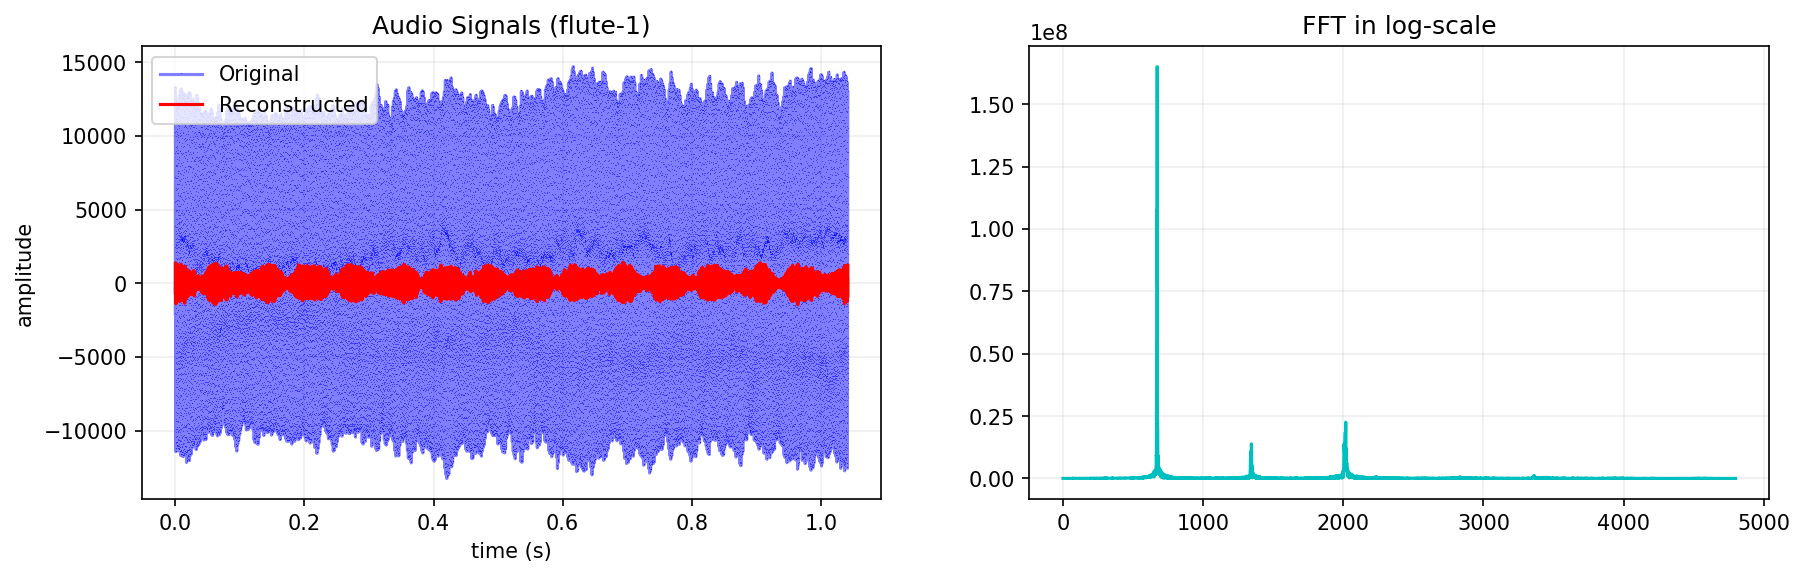

In [14]:
recovered_signal = compressive_sensing_random_sampling(signal_, sampling_ratio = 0.05, alpha = 0.01)

plt.figure(dpi = 150, figsize = (14, 4))
plt.suptitle

plt.subplot(1,2,1)
plt.grid(alpha = 0.2)
plt.title('Audio Signals (' + str(audio[2:-4]) + ')')
plt.plot(t_, signal_, 'b-,', alpha = 0.5, label = 'Original')
plt.plot(t_, recovered_signal, 'r-,',label = 'Reconstructed')
plt.xlabel('time (s)')
plt.ylabel('amplitude')
plt.legend()

plt.subplot(1,2,2)
plt.grid(alpha = 0.2)
plt.title('FFT in log-scale')
N_ = int(signal_.shape[0])
yf = fft.rfft(signal_)
xf = fft.rfftfreq(N_, 1 / rate)
end = 5000
plt.plot(xf[:end],np.abs(yf[:end]), 'c', label = 'Original')
yf_ = fft.rfft(recovered_signal)
xf_ = fft.rfftfreq(N_, 1 / rate)
end = 5000
plt.plot(xf_[:end],np.abs(yf_[:end]), 'm.', label = 'Reconstructed')
plt.yscale('log')
plt.legend()
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')

plt.tight_layout()
plt.show()


## 5% Sampling

  0%|                                                     | 0/3 [00:00<?, ?it/s]
2500it [00:00, 386985.53it/s]


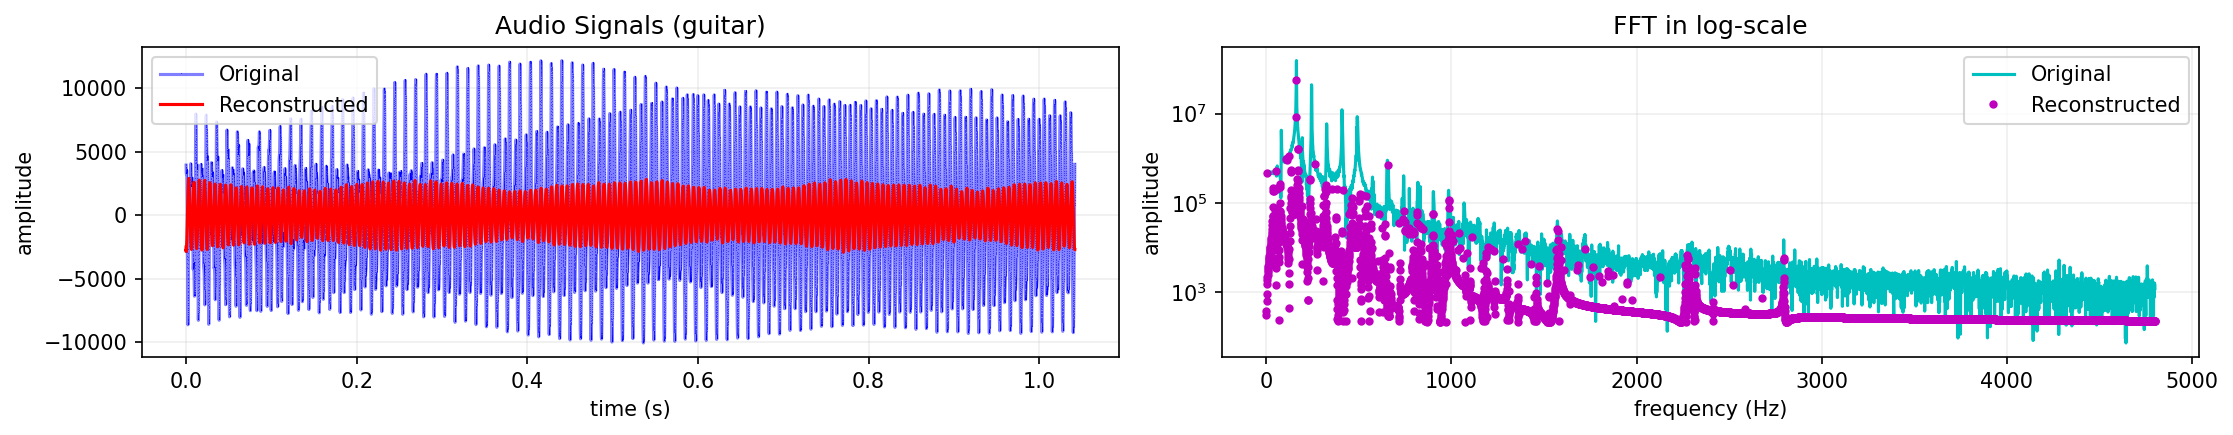

 33%|███████████████                              | 1/3 [00:13<00:27, 13.63s/it]
2500it [00:00, 595342.08it/s]


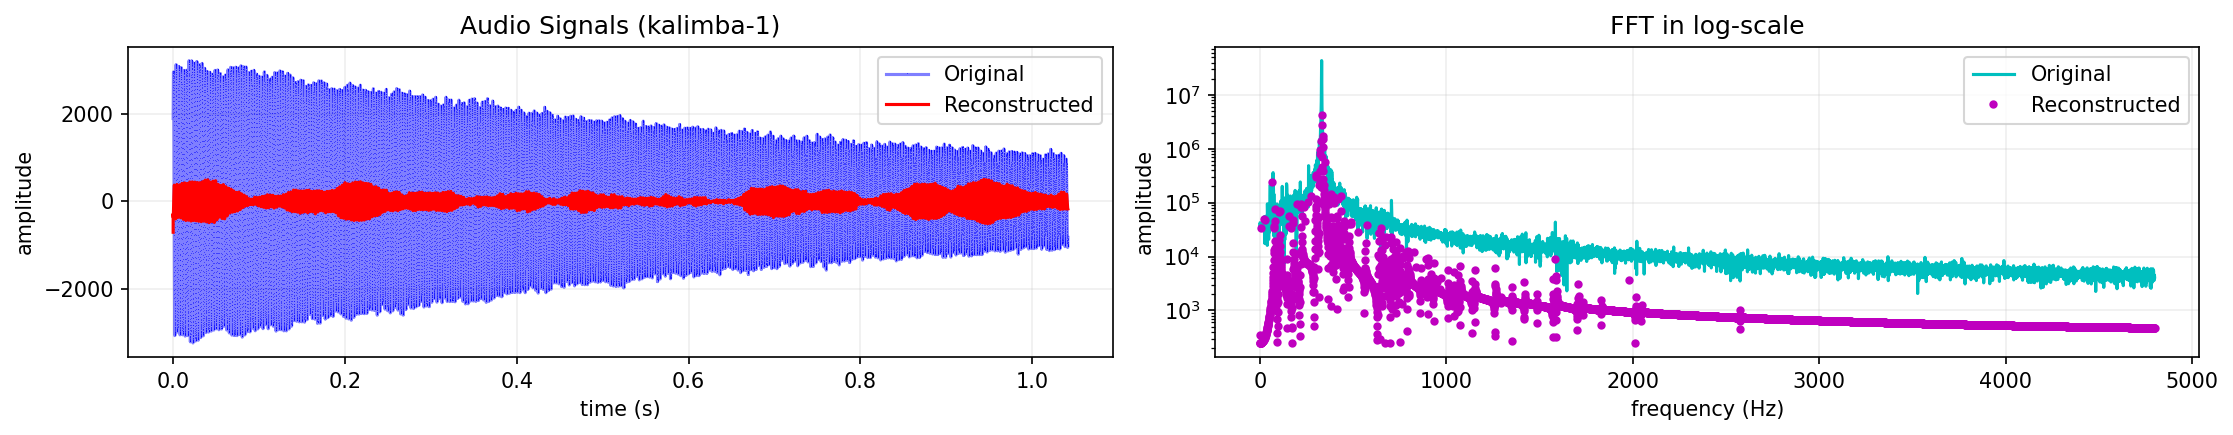

 67%|██████████████████████████████               | 2/3 [00:26<00:13, 13.23s/it]
2500it [00:00, 592014.45it/s]


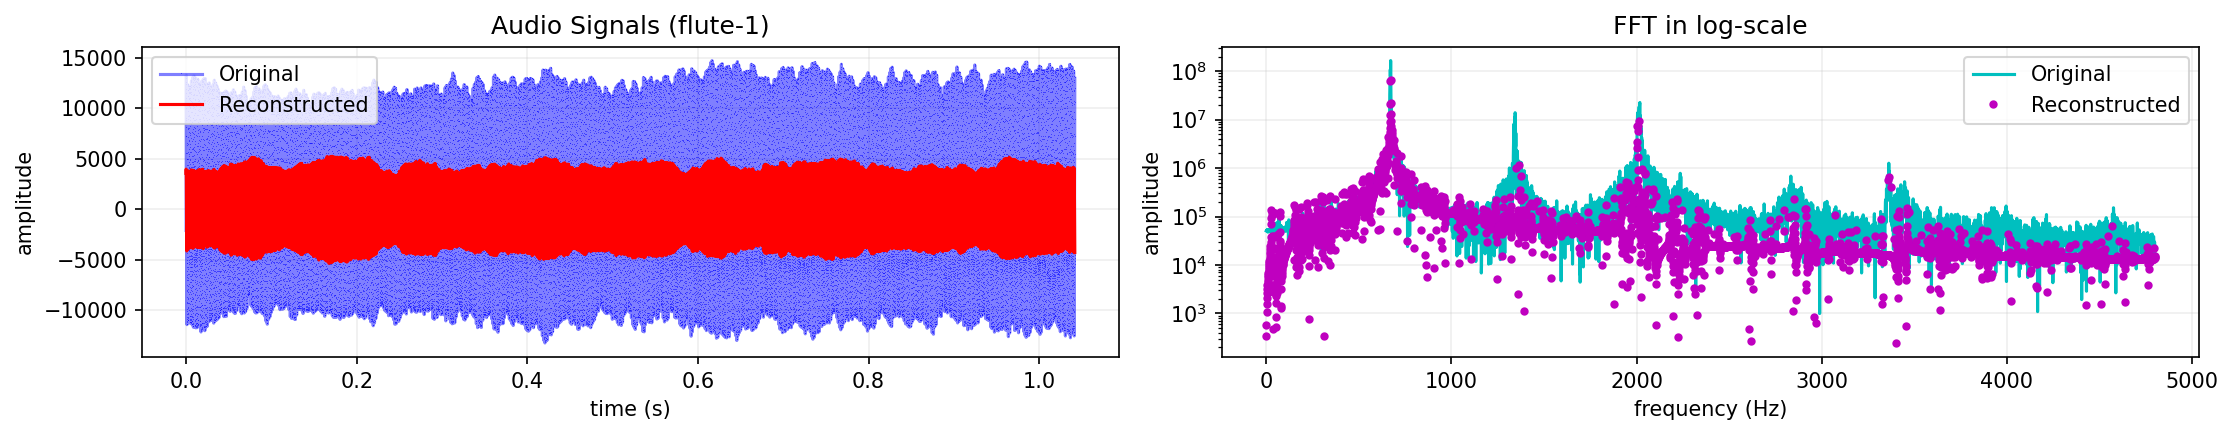

100%|█████████████████████████████████████████████| 3/3 [00:40<00:00, 13.39s/it]


In [15]:
sampling_ratio = 0.05
recovered_five_percent = []

for audio in tqdm(audio_files):
    rate, data = wavfile.read(audio)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])
    recovered_signal = compressive_sensing_random_sampling(signal_, sampling_ratio = sampling_ratio, alpha = 0.01)
    recovered_five_percent.append(recovered_signal)
      
    plt.figure(dpi = 150, figsize = (15, 3))
    plt.suptitle

    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    plt.title('Audio Signals (' + str(audio[2:-4]) + ')')
    plt.plot(t_, signal_, 'b-,', alpha = 0.5, label = 'Original')
    plt.plot(t_, recovered_signal, 'r-,',label = 'Reconstructed')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    plt.title('FFT in log-scale')
    N_ = int(signal_.shape[0])
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'c', label = 'Original')
    yf_ = fft.rfft(recovered_signal)
    xf_ = fft.rfftfreq(N_, 1 / rate)
    plt.plot(xf_[:end],np.abs(yf_[:end]), 'm.', label = 'Reconstructed')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')

    plt.tight_layout()
    plt.show()

## 10% Sampling

  0%|                                                     | 0/3 [00:00<?, ?it/s]
5000it [00:00, 145041.29it/s]


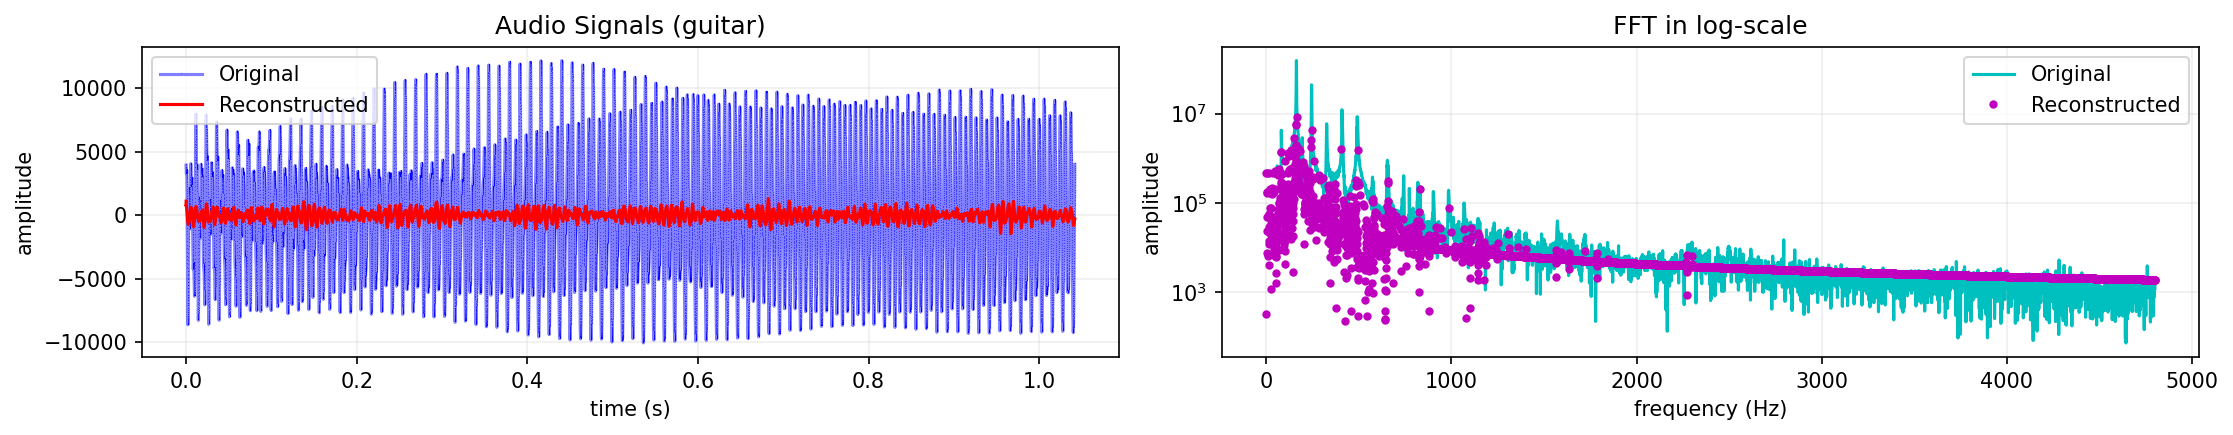

 33%|███████████████                              | 1/3 [00:19<00:38, 19.00s/it]
5000it [00:00, 603705.45it/s]


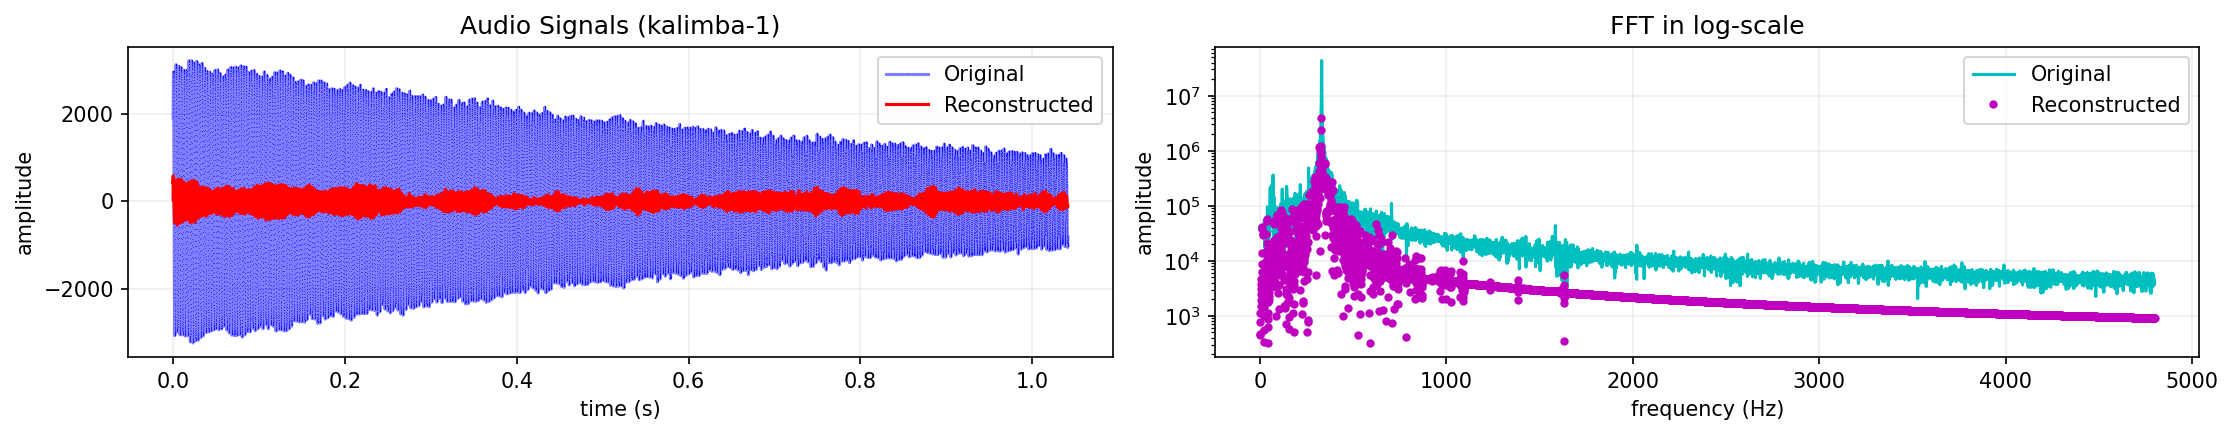

 67%|██████████████████████████████               | 2/3 [00:37<00:18, 18.82s/it]
5000it [00:00, 608999.88it/s]


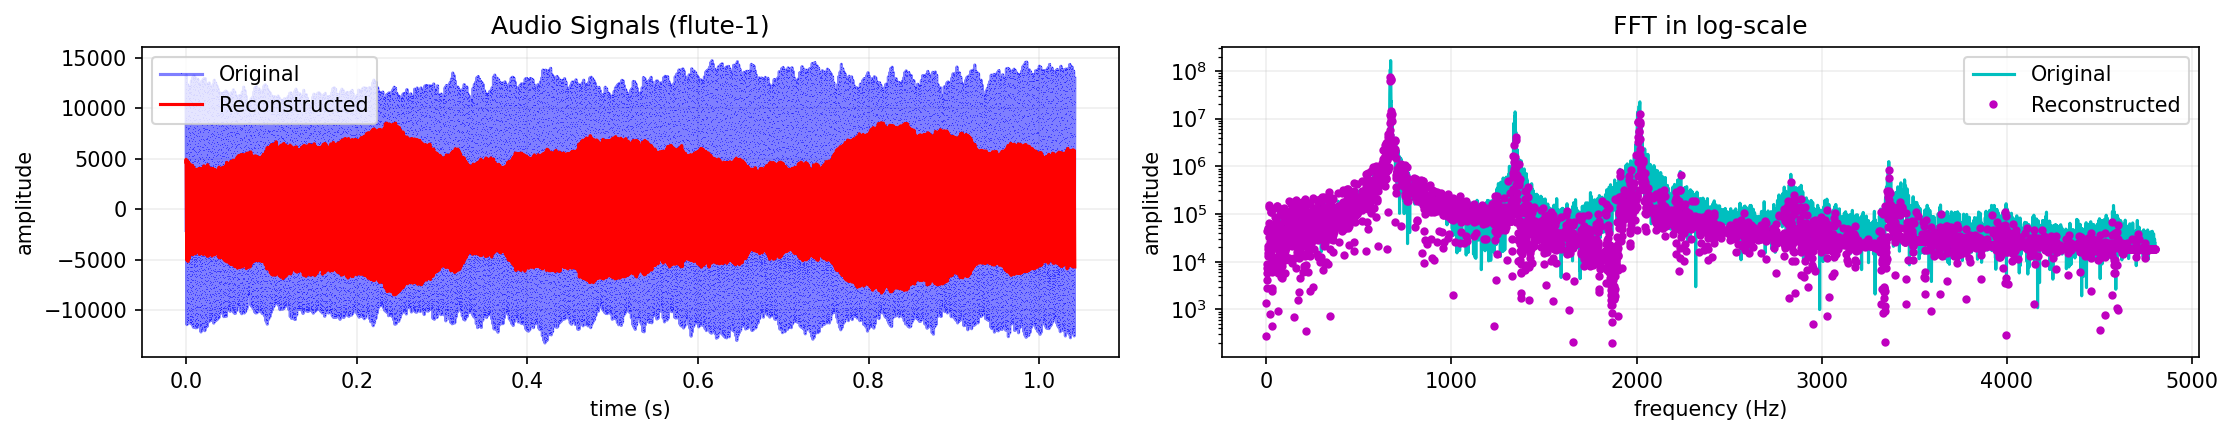

100%|█████████████████████████████████████████████| 3/3 [00:57<00:00, 19.01s/it]


In [12]:
sampling_ratio = 0.10
recovered_ten_percent = []

for audio in tqdm(audio_files):
    rate, data = wavfile.read(audio)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])
    recovered_signal = compressive_sensing_random_sampling(signal_, sampling_ratio = sampling_ratio, alpha = 0.01)
    recovered_ten_percent.append(recovered_signal)
      
    plt.figure(dpi = 150, figsize = (15, 3))
    plt.suptitle

    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    plt.title('Audio Signals (' + str(audio[2:-4]) + ')')
    plt.plot(t_, signal_, 'b-,', alpha = 0.5, label = 'Original')
    plt.plot(t_, recovered_signal, 'r-,',label = 'Reconstructed')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    plt.title('FFT in log-scale')
    N_ = int(signal_.shape[0])
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'c', label = 'Original')
    yf_ = fft.rfft(recovered_signal)
    xf_ = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf_[:end],np.abs(yf_[:end]), 'm.', label = 'Reconstructed')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')

    plt.tight_layout()
    plt.show()

## 20% Sampling

  0%|                                                     | 0/3 [00:00<?, ?it/s]
10000it [00:00, 171998.51it/s]


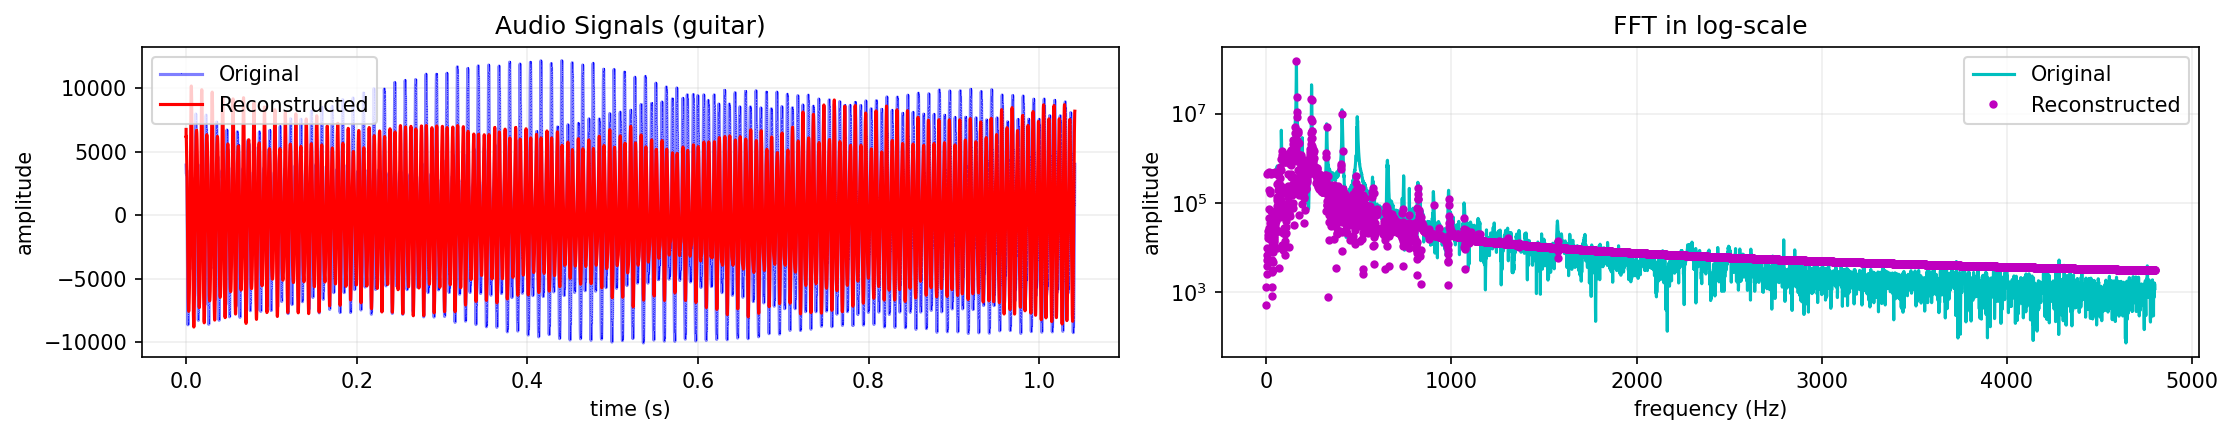

 33%|███████████████                              | 1/3 [00:27<00:54, 27.18s/it]
10000it [00:00, 601497.76it/s]


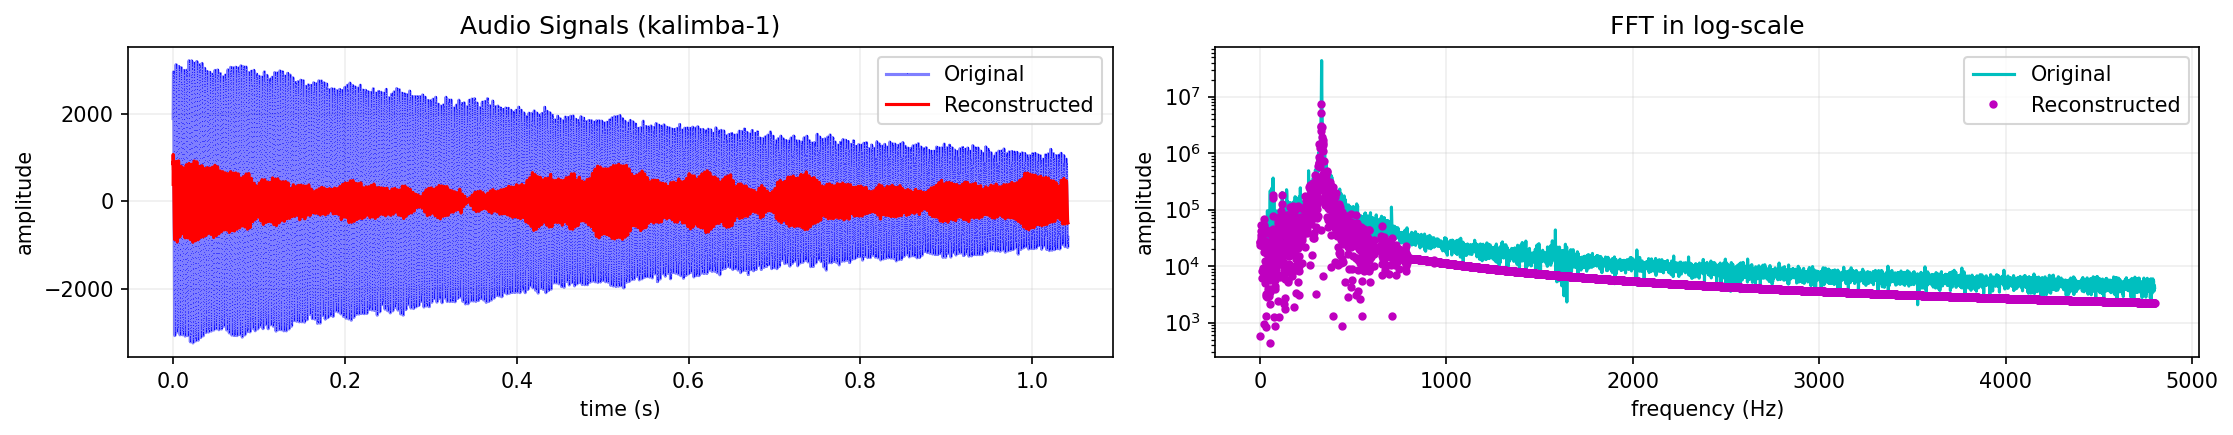

 67%|██████████████████████████████               | 2/3 [00:54<00:26, 26.98s/it]
10000it [00:00, 622716.06it/s]


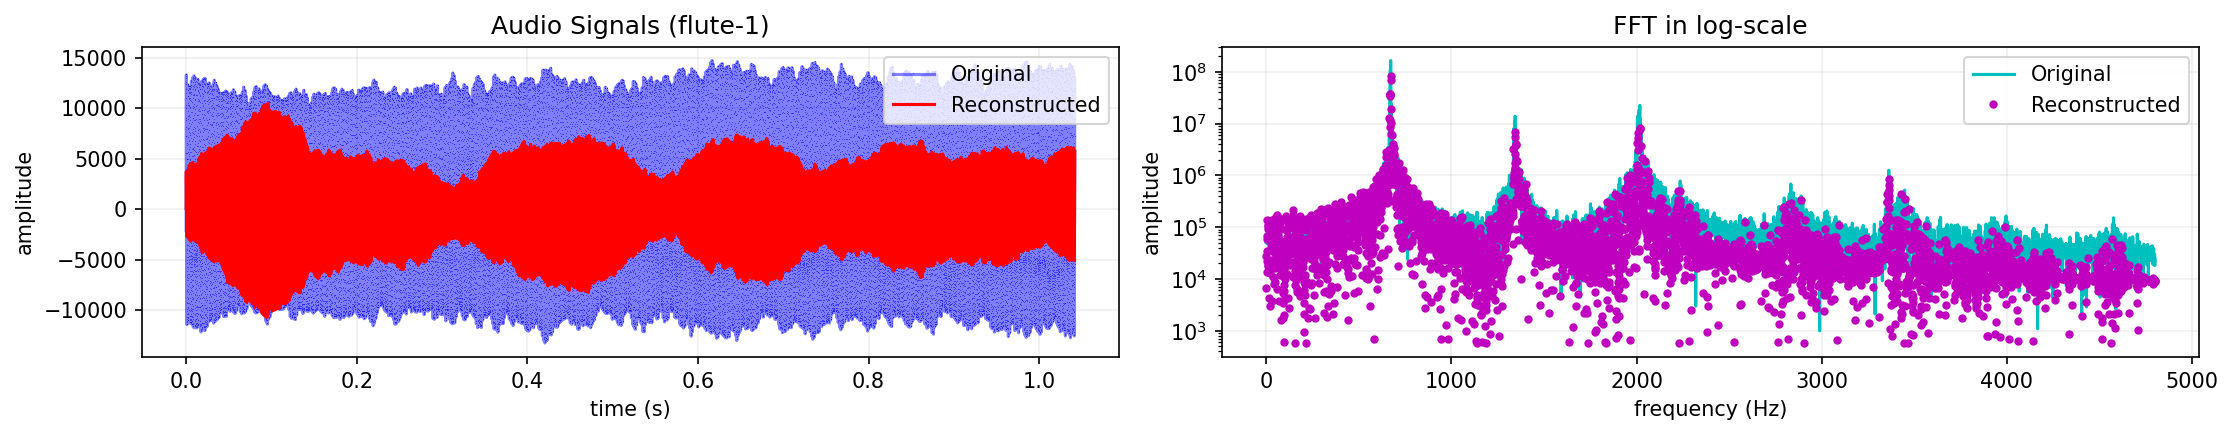

100%|█████████████████████████████████████████████| 3/3 [01:20<00:00, 26.99s/it]


In [11]:
sampling_ratio = 0.20
recovered_twenty_percent = []

for audio in tqdm(audio_files):
    rate, data = wavfile.read(audio)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])
    recovered_signal = compressive_sensing_random_sampling(signal_, sampling_ratio = sampling_ratio, alpha = 0.01)
    recovered_twenty_percent.append(recovered_signal)
      
    plt.figure(dpi = 150, figsize = (15, 3))
    plt.suptitle

    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    plt.title('Audio Signals (' + str(audio[2:-4]) + ')')
    plt.plot(t_, signal_, 'b-,', alpha = 0.5, label = 'Original')
    plt.plot(t_, recovered_signal, 'r-,',label = 'Reconstructed')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    plt.title('FFT in log-scale')
    N_ = int(signal_.shape[0])
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'c', label = 'Original')
    yf_ = fft.rfft(recovered_signal)
    xf_ = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf_[:end],np.abs(yf_[:end]), 'm.', label = 'Reconstructed')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')

    plt.tight_layout()
    plt.show()

## 50% Sampling

  0%|                                                     | 0/3 [00:00<?, ?it/s]
0it [00:00, ?it/s]
25000it [00:00, 234082.75it/s]


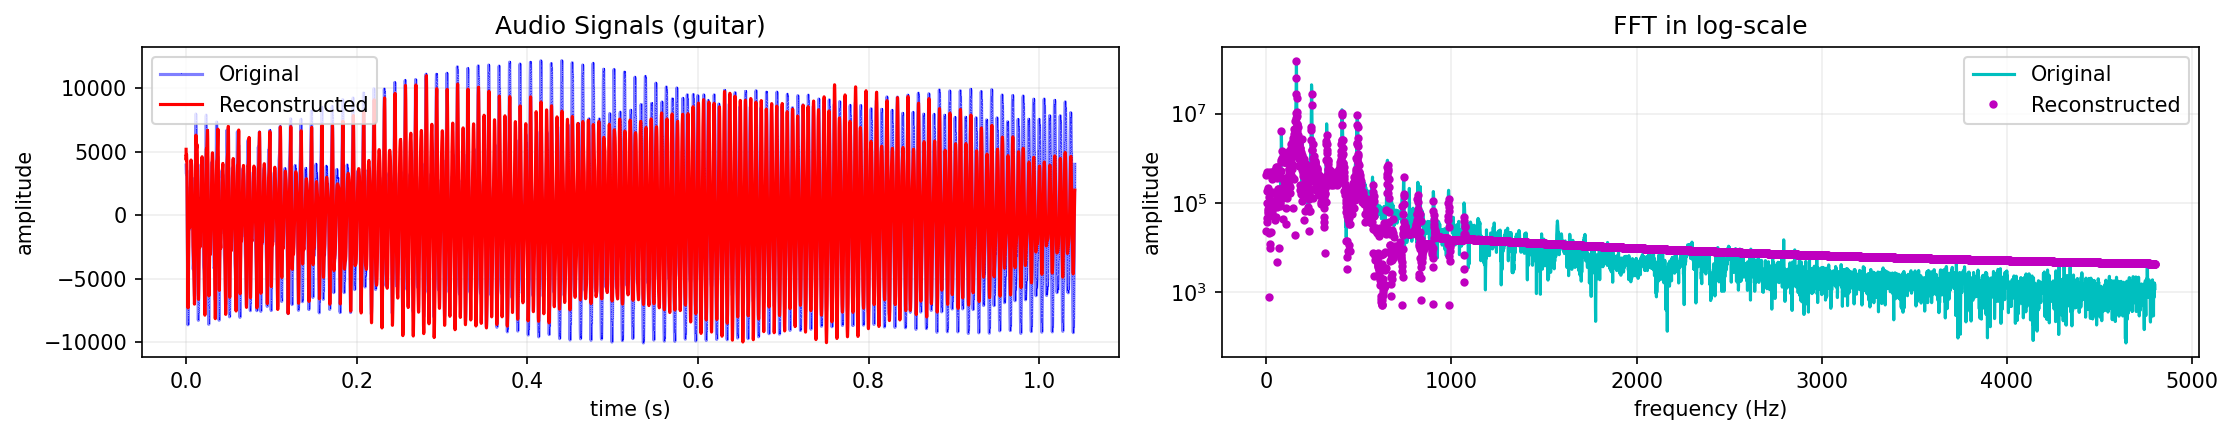

 33%|███████████████                              | 1/3 [01:00<02:00, 60.03s/it]
25000it [00:00, 639777.42it/s]


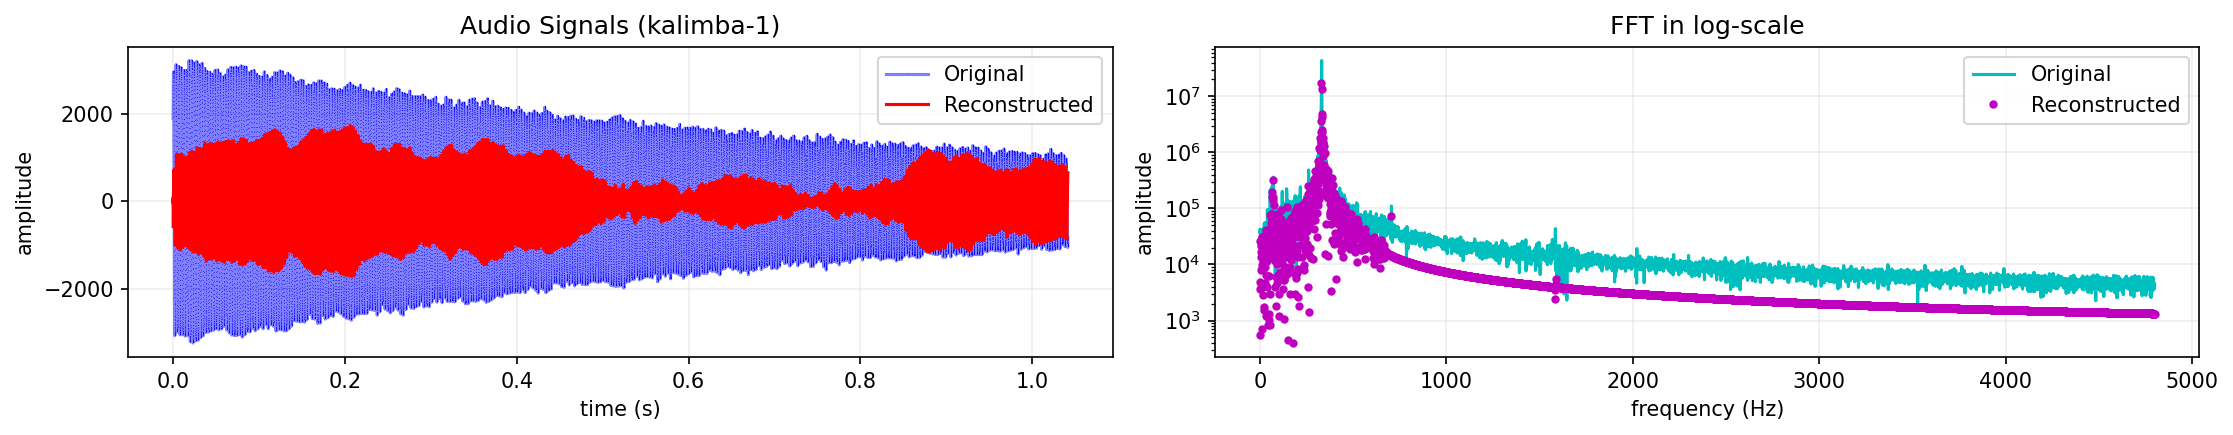

 67%|██████████████████████████████               | 2/3 [02:00<01:00, 60.42s/it]
25000it [00:00, 574845.68it/s]


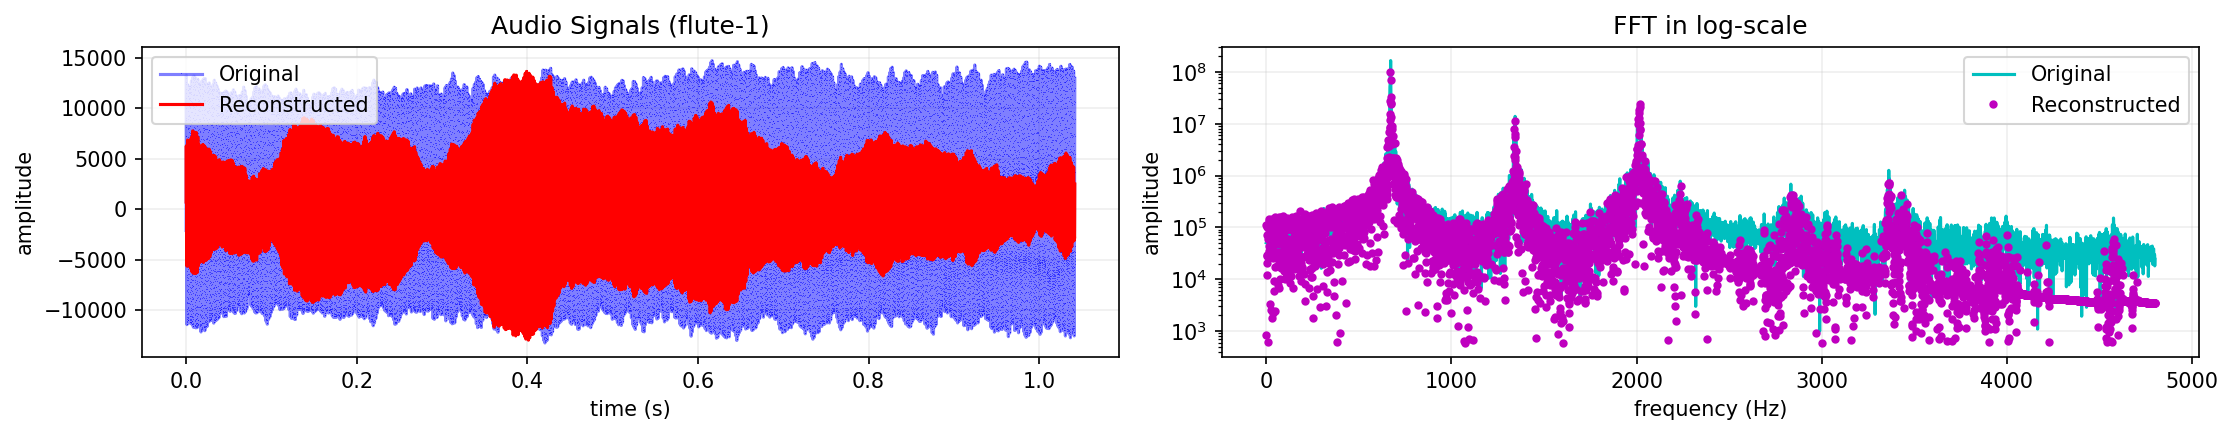

100%|█████████████████████████████████████████████| 3/3 [03:01<00:00, 60.39s/it]


In [10]:
sampling_ratio = 0.50
recovered_fifty_percent = []

for audio in tqdm(audio_files):
    rate, data = wavfile.read(audio)
    signal_ = data[50000:100000]               
    signal_ = (signal_/np.max(signal)) * 32767
    length = signal_.shape[0] / rate           
    t_ = np.linspace(0., length, signal_.shape[0])
    recovered_signal = compressive_sensing_random_sampling(signal_, sampling_ratio = sampling_ratio, alpha = 0.01)
    recovered_fifty_percent.append(recovered_signal)
      
    plt.figure(dpi = 150, figsize = (15, 3))
    plt.suptitle

    plt.subplot(1,2,1)
    plt.grid(alpha = 0.2)
    plt.title('Audio Signals (' + str(audio[2:-4]) + ')')
    plt.plot(t_, signal_, 'b-,', alpha = 0.5, label = 'Original')
    plt.plot(t_, recovered_signal, 'r-,',label = 'Reconstructed')
    plt.xlabel('time (s)')
    plt.ylabel('amplitude')
    plt.legend()

    plt.subplot(1,2,2)
    plt.grid(alpha = 0.2)
    plt.title('FFT in log-scale')
    N_ = int(signal_.shape[0])
    yf = fft.rfft(signal_)
    xf = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf[:end],np.abs(yf[:end]), 'c', label = 'Original')
    yf_ = fft.rfft(recovered_signal)
    xf_ = fft.rfftfreq(N_, 1 / rate)
    end = 5000
    plt.plot(xf_[:end],np.abs(yf_[:end]), 'm.', label = 'Reconstructed')
    plt.yscale('log')
    plt.legend()
    plt.xlabel('frequency (Hz)')
    plt.ylabel('amplitude')

    plt.tight_layout()
    plt.show()

In [ ]:
t